# Inspeção submarina

<be>

<br CLEAR="left" />

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/BPAUV-MP_from_HSV-.jpg/318px-BPAUV-MP_from_HSV-.jpg" align="right" alt="Lago Cratera, localizado no Oregon, EUA" style="padding-right: 5pt;">

<p>Os veículos autônomos subaquáticos (AUV, do inglês, *autonomous underwater vehicle*) são muito empregados para realizar operações submarinas em áreas de difícil acesso. Eles são robôs movidos por um sistema de propulsão e necessitam de mínima intervenção humana.
    Eles são utilizados em operações militares, comerciais ou de pesquisa e desenvolvimento.
    No setor de óleo e gás, por exemplo, eles são empregados na inspeção de linhas de produção sub-aquáticas.</p>

<p>Embora os AUVs possam navegar guiado por sensores com elevado grau de precisão, mantendo-se a pequenas distâncias do leito submarino, quando o terreno é bastante irregular, muitas vezes é necessário planejar previamente sua trajetória.</p>
    
    

## Objetivo

Dada a batimetria de um trecho em linha reta do leito do mar de Harel Brum, construir uma trajetória para um AUV  localizada a uma distância mínima de 10 metros do terreno.

## Leito marinho

Os dados brutos da batimetria nos fornecem o perfil abaixo:

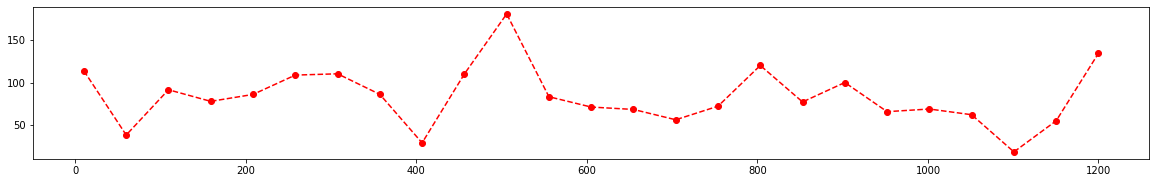

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(10,1200,25)
y = np.array([113.6, 38.4, 91.5, 77.9, 86.0, 108.7, 110.2, 86.1, 29.2, 110.0, 180.4, 83.3,
              71.2, 68.4, 56.3, 72.2, 120.0, 77.2, 100.0, 65.8, 68.9, 62.2, 18.6, 55.1, 134.3])

fig1, ax1 = plt.subplots(figsize=(20,20))
ax1.set_aspect('equal')
ax1.plot(x,y,'ro--')

### Polinômio de Lagrange

Agora, iremos visualizar o leito marinho usando um polinômio de Lagrange.

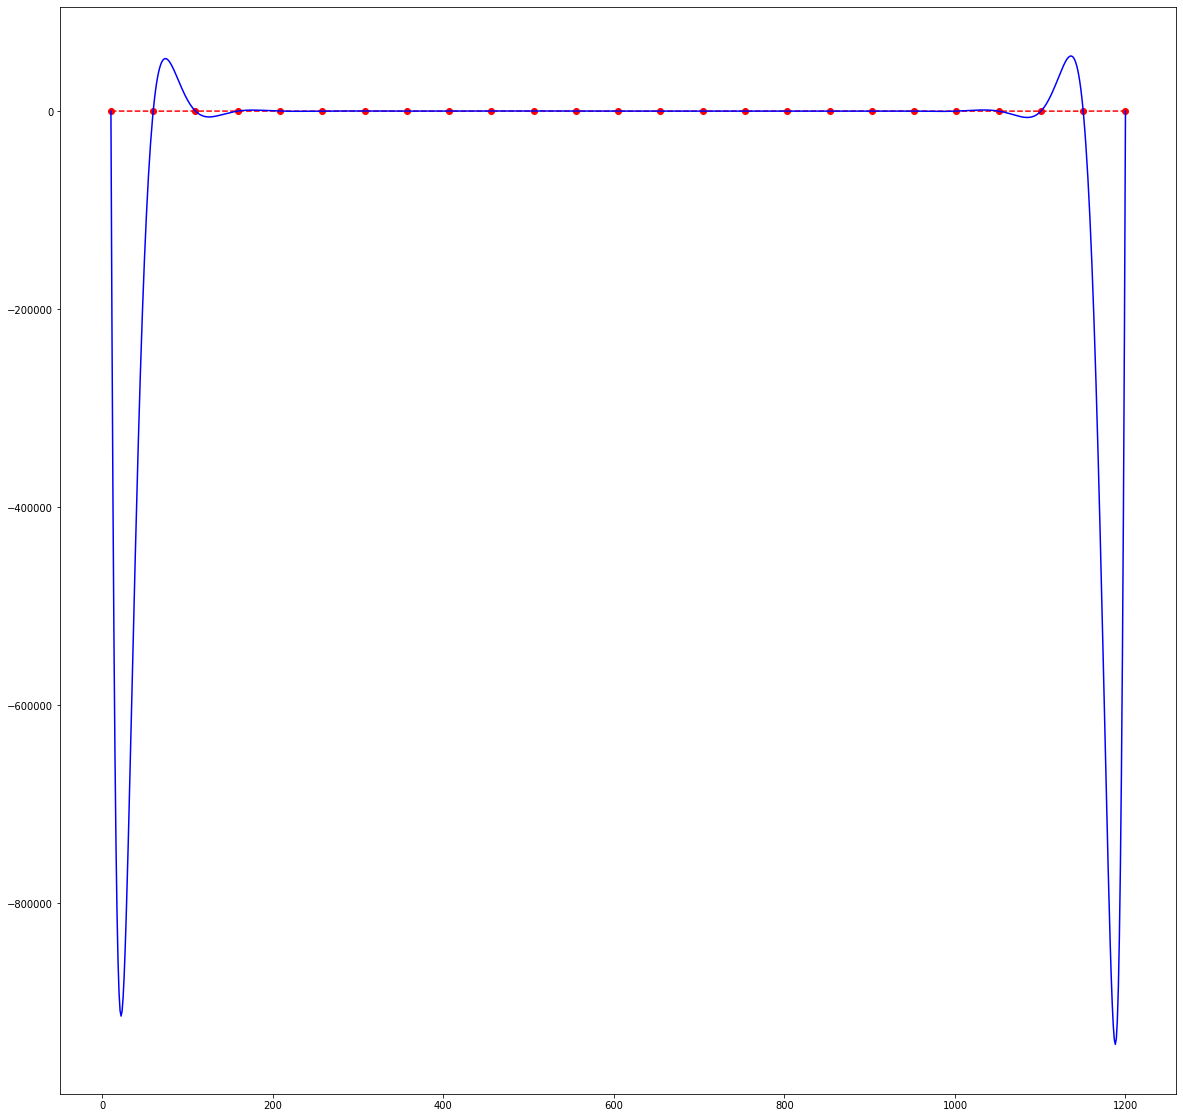

In [3]:
from scipy import interpolate


def lagrange2(x,y,a):
    pa = 0.0
    n = x.size
    for i in range(n):
        num = 1.0
        den = 1.0
        for j in range(n):
            if i != j:
                num *= (a - x[j])
                den *= (x[i] - x[j])
        pa += y[i]*(num/den)
        
    return pa
    


#def lagrange(x, y, a):
#    n = x.size
#    val = np.zeros(a.shape)
#    for i in range(n):
#        num = np.ones(a.shape)
#        den = np.ones(a.shape)
#        for j in range(n):
#            if i != j:
#                num = np.multiply( num, (a - x[j]*np.ones(a.shape)) )
#                den = (x[i] - x[j])*den
#        val = val + y[i]*np.divide(num, den)
#    return val

x_lag = np.linspace(x[0], x[x.size - 1], 1000)
#y_newton = lagrange(x,y,x_newton)
y_lag = np.zeros(x_lag.shape)
for i in range(1000):
    y_lag[i] = lagrange2(x,y,x_lag[i])

fig2, ax2 = plt.subplots(figsize=(20,20))
#ax2.set_aspect('equal')
ax2.plot(x,y,'ro--', x_lag,y_lag,'b-')

### Spline cúbica

Como pôde ser visto na seção anterior, é impossível usarmos um único polinômio para representar o leito submarino.
Esta dificuldade pode ser compreendida ao estudarmos o [fenômeno de Runge](https://pt.wikipedia.org/wiki/Fen%C3%B3meno_de_Runge).
Conseguiremos contornar este problema com as *splines cúbicas*.

Embora seja fácil construirmos uma spline cúbica a partir da definição, a matriz dos coeficientes do sistema de equações resultante não é muito interessante na prática. Veremos o porquê disso quando observamos o resultado do método de construção que apresentaremos a seguir, conforme a Seção 3.5 do nosso livro-texto.)

In [5]:
# TODO
# Implemente o algoritmo do livro-texto para construção de uma spline cúbica natural
n = x.size
a = np.zeros(x.shape)
b = np.zeros(x.shape)
c = np.zeros(x.shape)
d = np.zeros(x.shape)

# 1. a_j = f(x_j)
np.copyto(a,y)

# 2. Cálculo dos c's
A = np.zeros((n,n))
h = x[1] - x[0]
# primeira linha de A
A[0,0] = 2.0*h
A[0,1] = h
# linhas intermediárias de A
for i in range(1,n-1):
    A[i,i-1] = h
    A[i,i] = 4.0*h
    A[i,i+1] = h

    
print(A)

# 3. Cálculo dos b's

# 4. Cálculo dos d's

# 5. Plote o gráfico de S

[[ 99.16666667  49.58333333   0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ 49.58333333 198.33333333  49.58333333   0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          49.58333333 198.33333333  49.58333333   0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.          49.58333333 198.33333333  49.58333333
    0.           0.  

## Trajetória do AUV

Podemos construir a trajetória do AUV usando uma outra spline cúbica $T$.
Para tanto, precisamos definir pontos amostrais sobre os quais $T$ estará definida, afastados 10 metros do leito marinho.

### Geração dos pontos acima da curva

*Descreva aqui a lógica utilizada para gerar os pontos*

In [2]:
# TODO
# Sugestão: gere 100 pontos afastados ao menos 10 metros do leito marinho.
xt = ...
yt = ...

# Plote o gráfico do leito mais os pontos calculados

### Construção da trajetória

In [77]:
# TODO
# Implemente o algoritmo do livro-texto para construção de uma spline cúbica natural
at = np.zeros(xt.shape)
bt = np.zeros(xt.shape)
ct = np.zeros(xt.shape)
dt = np.zeros(xt.shape)

# 1. Cálculo dos a's
np.copyto(at,yt)

# 2. Cálculo dos c's

# 3. Cálculo dos b's

# 4. Cálculo dos d's

# 5. Plote o gráfico de S

## Saiba mais

* Esta atividade foi inspirada no artigo: MURTHY, Kiran; ROCK, Stephen. Spline-based trajectory planning techniques for benthic AUV operations. In: 2010 IEEE/OES Autonomous Underwater Vehicles. IEEE, 2010. p. 1-9.

* O algoritmo de construção de splines cúbicas naturais foi extraído da Seção 3.5 do livro: BURDEN, Richard L.; FAIRES, J. Douglas; BURDEN, Annette M., Análise numérica. São Paulo: Cengage Learning, 2015.

<br>
<p>&copy; 2019 Vicente Helano<br>
UFCA | Centro de Ciências e Tecnologia</p>